In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Mac用の日本語フォント設定
plt.rcParams['font.family'] = 'Hiragino Sans'


In [6]:
walkSmall_data = pd.read_csv("data/goto/walk_small_RToeOut.csv")
walkLarge_data = pd.read_csv("data/goto/walk_large_RToeOut.csv")
walkLarge_data.head()


,Time,RToeOut_X,RToeOut_Y,RToeOut_Z
0,0.00,0.131844,0.043048,1.087346
1,0.01,0.131865,0.043043,1.087368
2,0.02,0.131871,0.043053,1.087371
3,0.03,0.131875,0.043036,1.087374
4,0.04,0.131873,0.043040,1.087368


In [ ]:
z_start = 1.126109
y_start = 0.052657
x_start = -0.157764
# データの整形をしてグラフの描画にあるようにする

# 小さい歩幅の時
# -z方向データを、0始点のz方向に変換
walkSmall_data['Z'] = walkSmall_data['Z'].apply(lambda x: x-z_start)
walkSmall_data['Z'] = -walkSmall_data['Z']

# y軸方向のデータを0始点に変換
walkSmall_data['Y'] = walkSmall_data['Y'].apply(lambda x: x-y_start)

# x軸方向のデータを0始点に変更
walkSmall_data['X'] = walkSmall_data['X'].apply(lambda x: x-x_start)

def convert_axis(data: pd.DataFrame, x_column, y_column, z_column, x_start, y_start, z_start):
    data[z_column] = -data[z_column]
    data[z_column] = data[z_column].apply(lambda x: x-z_start)
    
    # convert y-axis
    data[y_column] = data[y_column].apply(lambda x: x-y_start)

    # convert z-axis
    data[x_column] = data[x_column].apply(lambda x: x-x_start)


KeyError: 'Z'

In [ ]:

# 大きい歩幅の時
walkLarge_data['RToeOut_Z'] = -walkLarge_data['RToeOut_Z']
walkLarge_data['RToeOut_Z'] = walkLarge_data['RToeOut_Z'].apply(lambda x: x+1.087346)

# y軸方向のデータを0始点に変換
walkLarge_data['RToeOut_Y'] = walkLarge_data['RToeOut_Y'].apply(lambda x: x-0.043048)

# x軸方向のデータを0始点に変換
walkLarge_data['RToeOut_X'] = walkLarge_data['RToeOut_X'].apply(lambda x: x-0.131844)


In [ ]:
walkSmall_data.head(20)


,Time,RToeOut_X,RToeOut_Y,RToeOut_Z
0,0.00,0.000000,0.000000,0.000000e+00
1,0.01,0.000023,0.000019,2.000000e-05
2,0.02,0.000039,0.000003,6.000000e-05
3,0.03,0.000039,0.000408,1.640000e-04
4,0.04,0.000045,-0.000012,4.000000e-05
5,0.05,0.000029,0.000000,-1.000000e-06
6,0.06,0.000055,-0.000044,5.400000e-05
7,0.07,0.000034,-0.000007,5.700000e-05
8,0.08,0.000054,-0.000040,7.700000e-05
9,0.09,0.000058,0.000391,1.680000e-04


In [ ]:
walkLarge_data.head(-1)


,Time,RToeOut_X,RToeOut_Y,RToeOut_Z
0,0.00,0.000000,0.000000,0.000000
1,0.01,0.000021,-0.000005,-0.000022
2,0.02,0.000027,0.000005,-0.000025
3,0.03,0.000031,-0.000012,-0.000028
4,0.04,0.000029,-0.000008,-0.000022
...,...,...,...,...
596,5.96,-0.048678,0.002565,2.011699
597,5.97,-0.048665,0.002557,2.011694
598,5.98,-0.048659,0.002537,2.011689
599,5.99,-0.048659,0.002522,2.011678


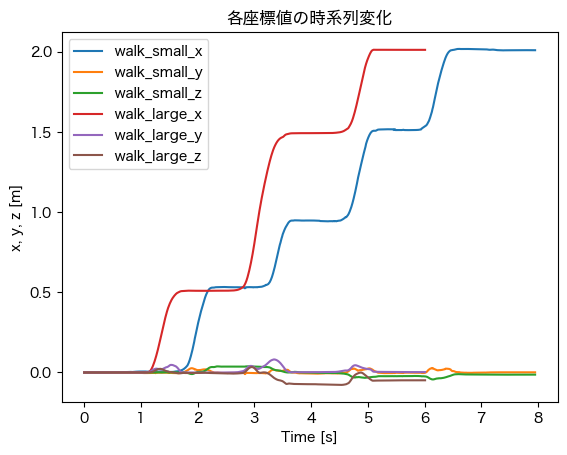

In [ ]:
t_small = walkSmall_data['Time']
walk_small_x = walkSmall_data['RToeOut_Z']
walk_small_y = walkSmall_data['RToeOut_Y']
walk_small_z = walkSmall_data['RToeOut_X']

t_large = walkLarge_data['Time']
walk_large_x = walkLarge_data['RToeOut_Z']
walk_large_y = walkLarge_data['RToeOut_Y']
walk_large_z = walkLarge_data['RToeOut_X']

# 半歩で歩いた時のデータ
plt.plot(t_small, walk_small_x, label='walk_small_x')
plt.plot(t_small, walk_small_y, label='walk_small_y')
plt.plot(t_small, walk_small_z, label='walk_small_z')

# 普通の歩幅で歩いた時のデータ
plt.plot(t_large, walk_large_x, label='walk_large_x')
plt.plot(t_large, walk_large_y, label='walk_large_y')
plt.plot(t_large, walk_large_z, label='walk_large_z')

plt.xlabel("Time [s]")
plt.ylabel("x, y, z [m]")
plt.title("各座標値の時系列変化")
plt.legend()


plt.show()


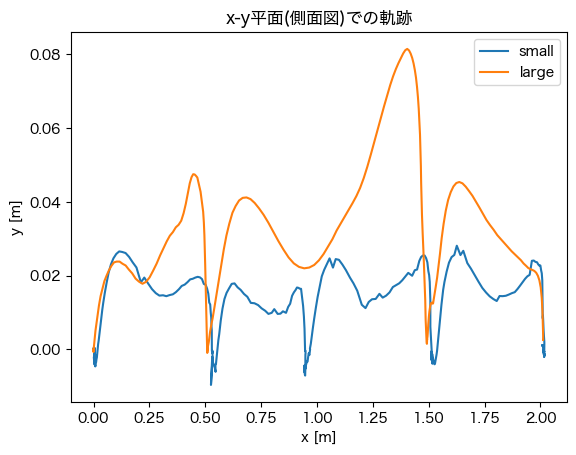

In [ ]:

plt.plot(walk_small_x, walk_small_y, label='small') # 半歩の時の歩幅の側面図
plt.plot(walk_large_x, walk_large_y, label='large') # 普通の歩幅の側面図
plt.title("x-y平面(側面図)での軌跡")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.legend()
plt.show()


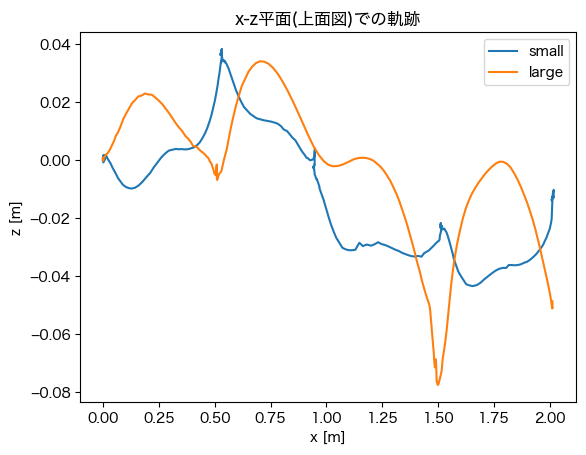

In [ ]:
plt.plot(walk_small_x, walk_small_z, label='small') # 半歩の時の歩幅の側面図
plt.plot(walk_large_x, walk_large_z, label='large') # 普通の歩幅の側面図
plt.title("x-z平面(上面図)での軌跡")
plt.xlabel("x [m]")
plt.ylabel("z [m]")
plt.legend()
plt.show()


In [ ]:
# 速度データを作成
dt_small = t_small.diff() # 時間の差分
walkSmall_data['RToeOut_vx'] = walk_small_x.diff() / dt_small
walkSmall_data['RToeOut_vy'] = walk_small_y.diff() / dt_small
walkSmall_data['RToeOut_vz'] = walk_small_z.diff() / dt_small

# 最初の値はNaNになるので0で置換
walkSmall_data['RToeOut_vx'] = walkSmall_data['RToeOut_vx'].fillna(0)
walkSmall_data['RToeOut_vy'] = walkSmall_data['RToeOut_vy'].fillna(0)
walkSmall_data['RToeOut_vz'] = walkSmall_data['RToeOut_vz'].fillna(0)

dt_large = t_large.diff()
walkLarge_data['RToeOut_vx'] = walk_large_x.diff() / dt_small
walkLarge_data['RToeOut_vy'] = walk_large_y.diff() / dt_small
walkLarge_data['RToeOut_vz'] = walk_large_z.diff() / dt_small

# 最初の値はNaNになるので0で置換
walkLarge_data['RToeOut_vx'] = walkLarge_data['RToeOut_vx'].fillna(0)
walkLarge_data['RToeOut_vy'] = walkLarge_data['RToeOut_vy'].fillna(0)
walkLarge_data['RToeOut_vz'] = walkLarge_data['RToeOut_vz'].fillna(0)


In [ ]:
walkSmall_data.head()


,Time,RToeOut_X,RToeOut_Y,RToeOut_Z,RToeOut_vx,RToeOut_vy,RToeOut_vz
0,0.00,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000
1,0.01,0.000023,0.000019,0.000020,0.0020,0.0019,0.0023
2,0.02,0.000039,0.000003,0.000060,0.0040,-0.0016,0.0016
3,0.03,0.000039,0.000408,0.000164,0.0104,0.0405,0.0000
4,0.04,0.000045,-0.000012,0.000040,-0.0124,-0.0420,0.0006


In [ ]:
walkLarge_data.head()


,Time,RToeOut_X,RToeOut_Y,RToeOut_Z,RToeOut_vx,RToeOut_vy,RToeOut_vz
0,0.00,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000
1,0.01,0.000021,-0.000005,-0.000022,-0.0022,-0.0005,0.0021
2,0.02,0.000027,0.000005,-0.000025,-0.0003,0.0010,0.0006
3,0.03,0.000031,-0.000012,-0.000028,-0.0003,-0.0017,0.0004
4,0.04,0.000029,-0.000008,-0.000022,0.0006,0.0004,-0.0002


In [ ]:
# 速度変化を描画

walk_small_vx = walkSmall_data['RToeOut_vx']
walk_small_vy = walkSmall_data['RToeOut_vy']
walk_small_vz = walkSmall_data['RToeOut_vz']

walk_large_vx = walkLarge_data['RToeOut_vx']
walk_large_vy = walkLarge_data['RToeOut_vy']
walk_large_vz = walkLarge_data['RToeOut_vz']

# 合成速度のカラムを作成
walkSmall_data["RToeOut_vxy"] = np.sqrt(walk_small_vx**2 + walk_small_vy**2)
walkLarge_data["RToeOut_vxy"] = np.sqrt(walk_large_vx**2 + walk_large_vy**2)


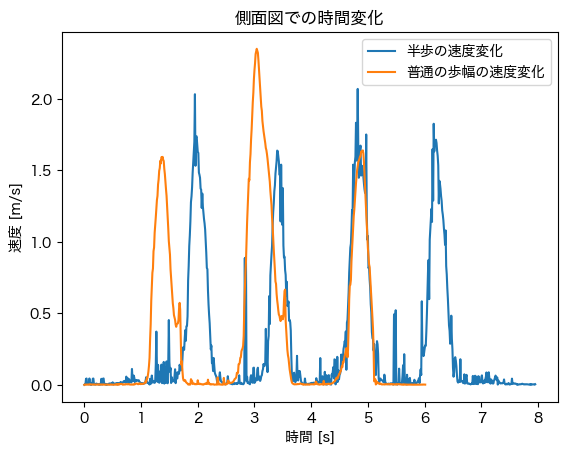

In [ ]:
# 側面図での時間変化を描画
plt.plot(t_small, walkSmall_data['RToeOut_vxy'], label='半歩の速度変化')
plt.plot(t_large, walkLarge_data['RToeOut_vxy'], label='普通の歩幅の速度変化')
plt.xlabel("時間 [s]")
plt.ylabel("速度 [m/s]")
plt.title("側面図での時間変化")
plt.legend()
plt.show()


In [ ]:
walkLarge_data.head(-1)


,Time,RToeOut_X,RToeOut_Y,RToeOut_Z,RToeOut_vx,RToeOut_vy,RToeOut_vz,RToeOut_vxy
0,0.00,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.000000
1,0.01,0.000021,-0.000005,-0.000022,-0.0022,-0.0005,0.0021,0.002256
2,0.02,0.000027,0.000005,-0.000025,-0.0003,0.0010,0.0006,0.001044
3,0.03,0.000031,-0.000012,-0.000028,-0.0003,-0.0017,0.0004,0.001726
4,0.04,0.000029,-0.000008,-0.000022,0.0006,0.0004,-0.0002,0.000721
...,...,...,...,...,...,...,...,...
596,5.96,-0.048678,0.002565,2.011699,-0.0006,0.0019,0.0007,0.001992
597,5.97,-0.048665,0.002557,2.011694,-0.0005,-0.0008,0.0013,0.000943
598,5.98,-0.048659,0.002537,2.011689,-0.0005,-0.0020,0.0006,0.002062
599,5.99,-0.048659,0.002522,2.011678,-0.0011,-0.0015,0.0000,0.001860


In [ ]:
walkSmall_data.head()


,Time,RToeOut_X,RToeOut_Y,RToeOut_Z,RToeOut_vx,RToeOut_vy,RToeOut_vz,RToeOut_vxy
0,0.00,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.000000
1,0.01,0.000023,0.000019,0.000020,0.0020,0.0019,0.0023,0.002759
2,0.02,0.000039,0.000003,0.000060,0.0040,-0.0016,0.0016,0.004308
3,0.03,0.000039,0.000408,0.000164,0.0104,0.0405,0.0000,0.041814
4,0.04,0.000045,-0.000012,0.000040,-0.0124,-0.0420,0.0006,0.043792


In [ ]:
# 速度変化を描画

walk_small_vx = walkSmall_data['RToeOut_vx']
walk_small_vy = walkSmall_data['RToeOut_vy']
walk_small_vz = walkSmall_data['RToeOut_vz']

walk_large_vx = walkLarge_data['RToeOut_vx']
walk_large_vy = walkLarge_data['RToeOut_vy']
walk_large_vz = walkLarge_data['RToeOut_vz']

# 合成速度のカラムを作成
walkSmall_data["RToeOut_vxz"] = np.sqrt(walk_small_vx**2 + walk_small_vz**2)
walkLarge_data["RToeOut_vxz"] = np.sqrt(walk_large_vx**2 + walk_large_vz**2)


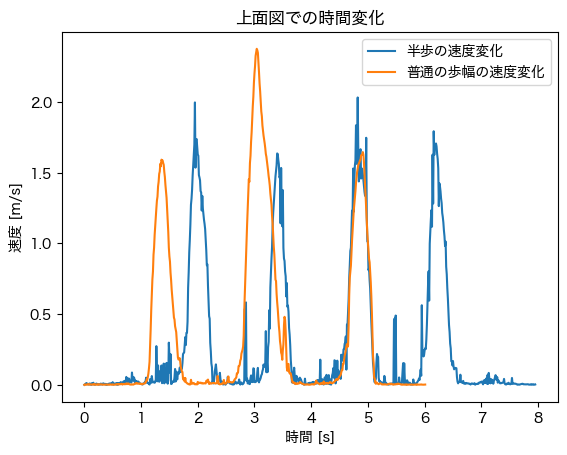

In [ ]:
# 側面図での時間変化を描画
plt.plot(t_small, walkSmall_data['RToeOut_vxz'], label='半歩の速度変化')
plt.plot(t_large, walkLarge_data['RToeOut_vxz'], label='普通の歩幅の速度変化')
plt.xlabel("時間 [s]")
plt.ylabel("速度 [m/s]")
plt.title("側面図での時間変化")
plt.legend()
plt.show()


In [ ]:
# 合成速度のカラムを作成
walkSmall_data["RToeOut_vyz"] = np.sqrt(walk_small_vy**2 + walk_small_vz**2)
walkLarge_data["RToeOut_vyz"] = np.sqrt(walk_large_vy**2 + walk_large_vz**2)

# 側面図での時間変化を描画
plt.plot(t_small, walkSmall_data['RToeOut_vyz'], label='半歩の速度変化')
plt.plot(t_large, walkLarge_data['RToeOut_vyz'], label='普通の歩幅の速度変化')
plt.xlabel("時間 [s]")
plt.ylabel("速度 [m/s]")
plt.title("上面図での時間変化")
plt.legend()
plt.show()


NameError: name 'walk_small_vy' is not defined